In [19]:
# Importing python libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans

In [20]:
#Loading Customers Dataset
data = pd.read_csv('customers.csv')
data.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [21]:
data.shape

(200, 5)

C:\Users\user\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Age', ylabel='Spending Score (1-100)'>

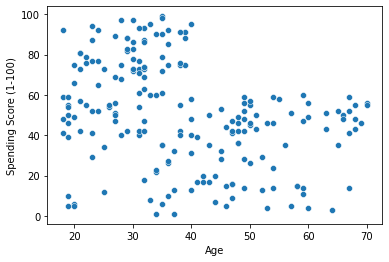

In [22]:
# Creating a scatter plot with Age as X and Spending Score as Y
x = data['Age']
y = data['Spending Score (1-100)']
scatter_plot = sns.scatterplot(x,y)
scatter_plot

In [23]:
# Changing Gender column into int
data["Gender"] = np.where(data['Gender'] == 'Male',1,0)
data.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,1,19,15,39
1,2,1,21,15,81
2,3,0,20,16,6
3,4,0,23,16,77
4,5,0,31,17,40


C:\Users\user\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:881: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


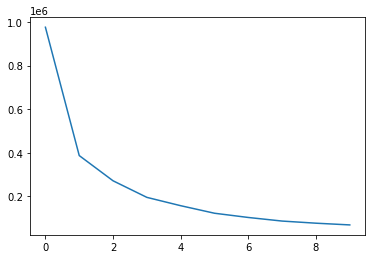

In [24]:
# Finding out the best number for clusters between 1 and 10 (inclusive) using the elbowmethod.
ssd = []

range_n_clusters = range(1,11)

for num_clusters in range_n_clusters:
    kmeans = KMeans(n_clusters = num_clusters)
    kmeans.fit(data)
    ssd.append(kmeans.inertia_)
plt.plot(ssd)


In [25]:
kmeans = KMeans(n_clusters = 4)
kmeans.fit(data)

KMeans(n_clusters=4)

C:\Users\user\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Age', ylabel='Spending Score (1-100)'>

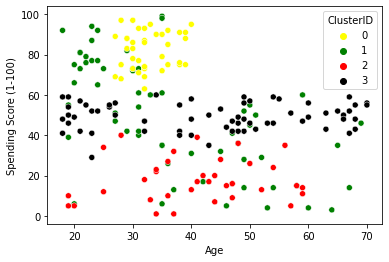

In [26]:
data['ClusterID']=kmeans.labels_
sns.scatterplot(x,y,palette=['yellow','green',"red","black"], hue=data["ClusterID"])